[*********************100%***********************]  1 of 1 completed


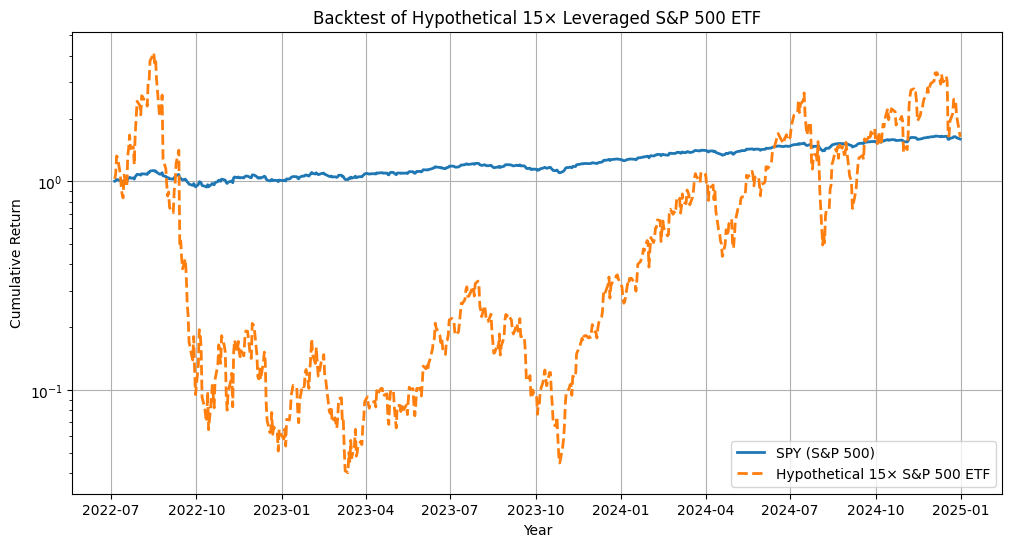

In [75]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Parameters
START_DATE = "2022-07-01"
END_DATE = "2025-01-01"
LEVERAGE = 15
EXPENSE_RATIO = 0.01  # 10% per year

# Download historical S&P 500 data (SPY ETF as a proxy)
spy = yf.download("SPY", start=START_DATE, end=END_DATE)
spy["Daily Return"] = spy["Close"].pct_change()

# Simulating a 15× leveraged ETF
leveraged_returns = LEVERAGE * spy["Daily Return"]

# Apply Expense Ratio (daily)
daily_expense = (1 - EXPENSE_RATIO) ** (1/252)  # Convert annual to daily reduction
leveraged_returns = leveraged_returns * daily_expense

# Create cumulative returns
spy["Cumulative SPY"] = (1 + spy["Daily Return"]).cumprod()
leveraged_cumulative = (1 + leveraged_returns).cumprod()

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(spy.index, spy["Cumulative SPY"], label="SPY (S&P 500)", linewidth=2)
plt.plot(spy.index, leveraged_cumulative, label="Hypothetical 15× S&P 500 ETF", linewidth=2, linestyle="dashed")
plt.yscale("log")  # Log scale for better visualization
plt.xlabel("Year")
plt.ylabel("Cumulative Return")
plt.title("Backtest of Hypothetical 15× Leveraged S&P 500 ETF")
plt.legend()
plt.grid()
plt.show()


In [2]:
print(spy.head())

Price           Close       High        Low       Open    Volume
Ticker            SPY        SPY        SPY        SPY       SPY
Date                                                            
2000-01-03  92.692924  94.485439  91.697083  94.485439   8164300
2000-01-04  89.068062  91.816584  88.998353  91.477998   8089800
2000-01-05  89.227386  90.203311  87.474706  89.187553  12177900
2000-01-06  87.793365  90.183385  87.793365  88.988375   6227200
2000-01-07  92.892105  92.892105  89.267242  89.426576   8066500
